# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [2]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
response = requests.get(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [3]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(response.text, 'html.parser')

In [6]:
# Extract all rows of data
table = soup.find('table')
rows = table.find_all('tr')
for row in rows:
    cells = row.find_all('td')
    for cell in cells:
        print(cell.text)

Streaming output truncated to the last 5000 lines.
-85.0
809.0
1179
2016-02-09
1248
106
4
-86.0
807.0
1180
2016-02-10
1249
106
4
-85.0
806.0
1182
2016-02-11
1250
107
4
-85.0
804.0
1185
2016-02-12
1251
107
4
-85.0
803.0
1184
2016-02-13
1252
108
4
-85.0
802.0
1181
2016-02-14
1253
108
4
-85.0
800.0
1183
2016-02-15
1254
109
4
-84.0
799.0
1187
2016-02-16
1255
109
4
-84.0
798.0
1186
2016-02-17
1256
110
4
-84.0
797.0
1188
2016-02-18
1257
110
4
-84.0
794.0
1189
2016-02-19
1258
111
4
-83.0
794.0
1190
2016-02-20
1259
111
4
-84.0
794.0
1191
2016-02-21
1260
112
4
-83.0
792.0
1192
2016-02-22
1261
112
4
-81.0
790.0
1193
2016-02-23
1262
112
4
-81.0
790.0
1194
2016-02-24
1263
113
4
-84.0
788.0
1195
2016-02-25
1264
113
4
-84.0
787.0
1197
2016-02-26
1265
114
4
-81.0
787.0
1196
2016-02-27
1266
114
4
-82.0
787.0
1198
2016-02-28
1267
115
4
-83.0
786.0
1199
2016-02-29
1268
115
4
-83.0
784.0
1201
2016-03-01
1269
116
4
-83.0
782.0
1200
2016-03-03
1270
116
4
-82.0
782.0
1202
2016-03-04
1271
117
4
-84.0
781.0
1

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows
for row in rows:
    cells = row.find_all('td')

    if len(cells) == 7:  # Adjust this number based on your table structure
        # Create a dictionary for the current row
        row_data = {
            'id': cells[0].text.strip(),
            'terrestrial_date': cells[1].text.strip(),
            'sol': cells[2].text.strip(),
            'ls': cells[3].text.strip(),
            'month': cells[4].text.strip(),
            'min_temp': cells[5].text.strip(),
            'pressure': cells[6].text.strip()
        }
        data.append(row_data)

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_weather_df = pd.DataFrame(data)

In [9]:
# Confirm DataFrame was created successfully
mars_weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
dtypes = mars_weather_df.dtypes
print(dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [12]:
# Change data types for data analysis
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])
mars_weather_df['sol'] = mars_weather_df['sol'].astype(int)
mars_weather_df['ls'] = mars_weather_df['ls'].astype(int)
mars_weather_df['month'] = mars_weather_df['month'].astype(int)
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(float)
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(float)

In [15]:
# Confirm type changes were successful by examining data types again
dtypes = mars_weather_df.dtypes
print(dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [16]:
# 1. How many months are there on Mars?
mars_weather_df['month'].max()

12

In [33]:
# 2. How many sols (Martian days) worth of data are there?
mars_weather_df['sol'].max() - mars_weather_df['sol'].min()

1967

In [34]:
# 3. What is the average minimum temperature by month?
temps = mars_weather_df.groupby('month')['min_temp'].mean()
print(temps)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


<Axes: title={'center': 'Average Minimum Temperature by Month'}, xlabel='month'>

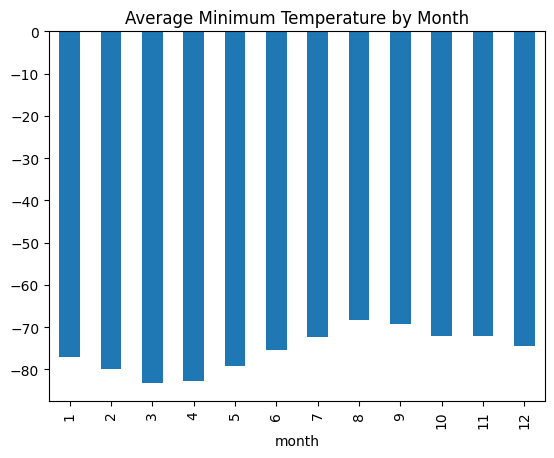

In [35]:
# Plot the average minimum temperature by month
tempsplt = temps.plot(kind='bar', x='month', y='min_temp', title='Average Minimum Temperature by Month')
tempsplt

<Axes: title={'center': 'Average Minimum Temperature by Month'}, xlabel='month'>

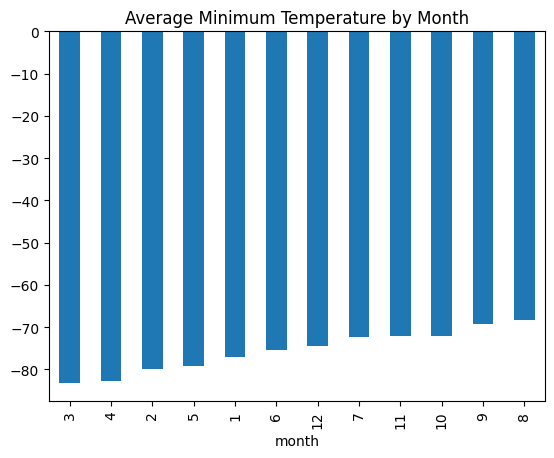

In [36]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
tempssorted = temps.sort_values(ascending=True).plot(kind='bar', x='month', y='min_temp', title='Average Minimum Temperature by Month')
tempssorted

In [37]:
# 4. What is the average pressure by month?
pressure = mars_weather_df.groupby('month')['pressure'].mean()
print(pressure)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


<Axes: title={'center': 'Average Pressure by Month'}, xlabel='month'>

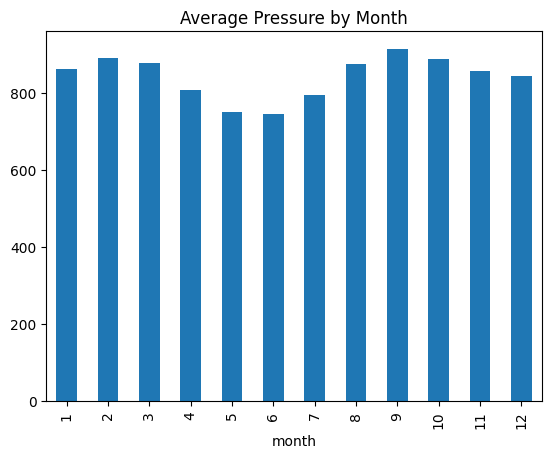

In [38]:
# Plot the average pressure by month
pressureplt = pressure.plot(kind='bar', x='month', y='pressure', title='Average Pressure by Month')
pressureplt

<Axes: title={'center': 'Average Pressure by Month'}, xlabel='month'>

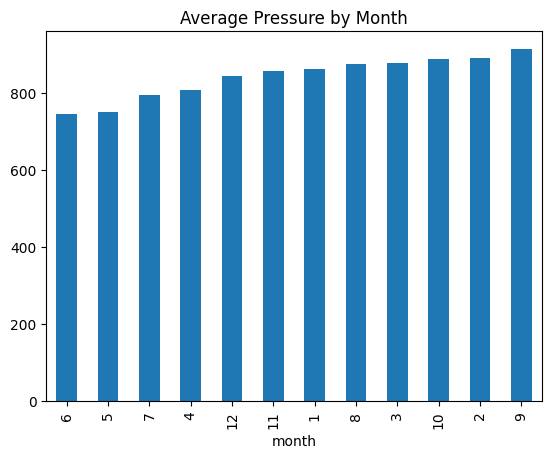

In [39]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
pressuresorted = pressure.sort_values(ascending=True).plot(kind='bar', x='month', y='pressure', title='Average Pressure by Month')
pressuresorted

<Axes: title={'center': 'Minimum Temperature by Date'}, xlabel='terrestrial_date'>

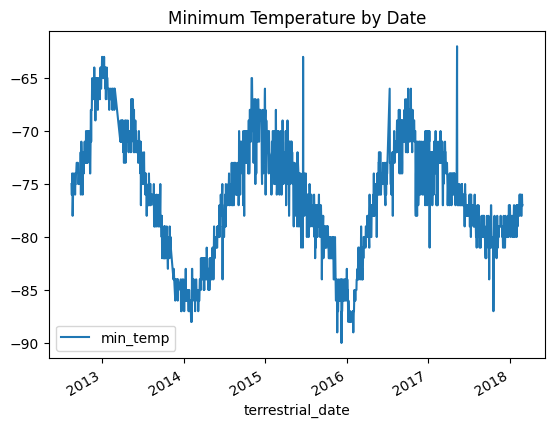

In [40]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
daysvtemp = mars_weather_df.plot(kind='line', x='terrestrial_date', y='min_temp', title='Minimum Temperature by Date')
daysvtemp

#### Minimum Temperature

The coldest months on mars would be months 3 and 4, while the warmest months are 8 and 9.

#### Atmospheric Pressure

The months with the lowest atmospheric pressure are 6 and 5, and the ones with the highest atmospheric pressure are 9 and 2.

#### Year Length

Based on the information my graph shows, it looks like a martian year is a little less than two terrestrial years. I would estimate that it takes about 700 terrestrial days for mars to complete a full orbit around the sun.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [41]:
# Write the data to a CSV
mars_weather_df.to_csv('mars_weather_data.csv', index=False)

In [1]:
# browser.quit()
# ommitted because i am not using chromedriver for this activity